## Overview

## Business Understanding

**Goal:** Reduce customer churn in a telecom company.

**Problem Statement:** Customers leaving the service impacts revenue. We want to predict which customers are likely to churn so the company can intervene.

- What patterns exist in churn vs non-churn customers?
- Which features are most predictive?
- Can a simple model already give useful insights?

**Objective**
- Build a classification model
- Identify key drivers of churn
- Provide actionable retention strategies

**Success Criteria:** A model that accurately identifies high-risk customers, with actionable insights (e.g., which features drive churn) e.g., ROC-AUC > 0.75, actionable feature insights.

In [48]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#load the dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
#lets check the first 5 rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Data Exploration

Lets go through the data, checking its information, shape etc

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [50]:
df.shape

(3333, 21)

In [51]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data Cleaning

Lets clean the data by first handling missing values

In [52]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There is no missing values in our dataset. Lets now drop irrelevant columns that don't affect churn

In [53]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [54]:
columns_to_drop = [
    'phone number',
    'total day charge',
    'total eve charge',
    'total night charge',
    'total intl charge'
]

df.drop(columns=columns_to_drop, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  customer service calls  3333 non-null   

Charges have been dropped due to perfect multicolinearity with minutes, reducing redundancy and improving model stability

Lets also check for duplicates.

In [62]:
df.duplicated().sum()

0

## Exploratory Data Analysis

<Figure size 800x400 with 0 Axes>

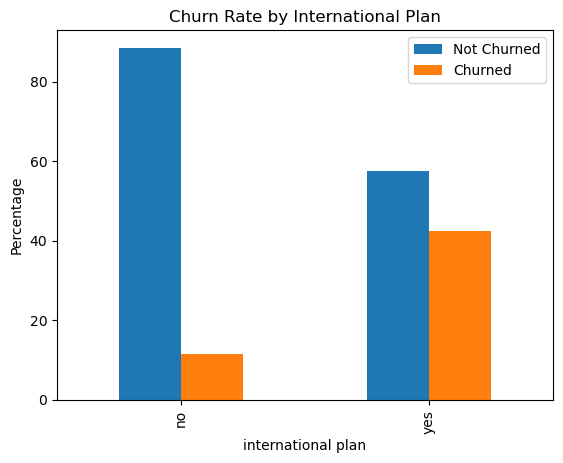

In [65]:
#Churn by international plan
if 'international plan' in df.columns:
    plt.figure(figsize=(8, 4))
    churn_by_plan = pd.crosstab(df['international plan'], df['churn'], normalize='index') * 100
    churn_by_plan.plot(kind='bar')
    plt.title('Churn Rate by International Plan')
    plt.ylabel('Percentage')
    plt.legend(['Not Churned', 'Churned'])
    plt.show()

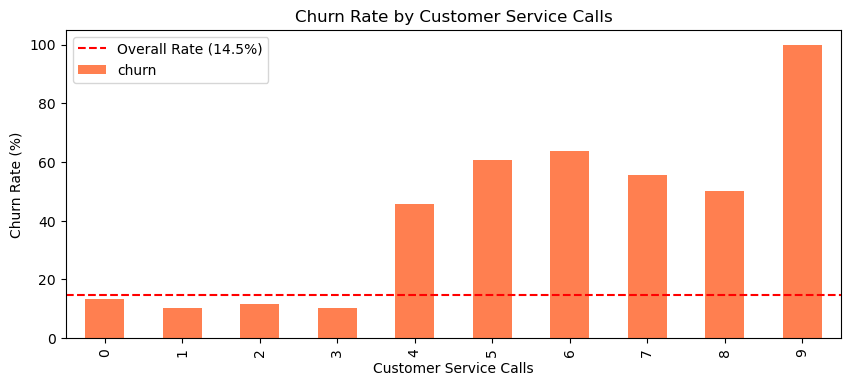

In [67]:
#Churn by customer service calls
if 'customer service calls' in df.columns:
    plt.figure(figsize=(10, 4))
    service_calls_churn = df.groupby('customer service calls')['churn'].mean() * 100
    service_calls_churn.plot(kind='bar', color='coral')
    plt.title('Churn Rate by Customer Service Calls')
    plt.xlabel('Customer Service Calls')
    plt.ylabel('Churn Rate (%)')
    plt.axhline(y=df['churn'].mean() * 100, color='red', linestyle='--', 
                label=f'Overall Rate ({df["churn"].mean()*100:.1f}%)')
    plt.legend()
    plt.show()

**Target Variable**

In [55]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [56]:
#Check churn balance

df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='count'>

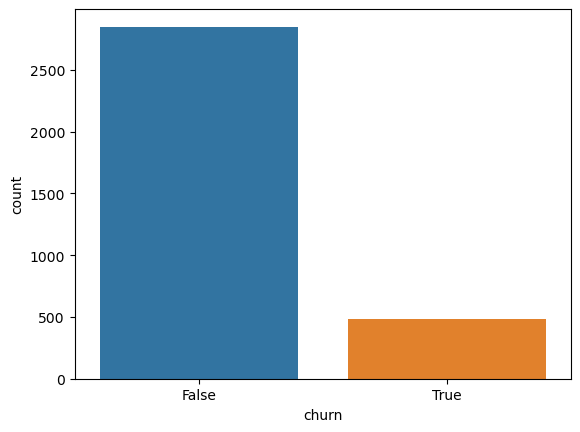

In [57]:
sns.countplot(x='churn', data=df)

In [58]:
#lets check the correlation between the features
#encode categorical variables

df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total eve minutes       3333 non-null   float64
 6   total eve calls         3333 non-null   int64  
 7   total night minutes     3333 non-null   float64
 8   total night calls       3333 non-null   int64  
 9   total intl minutes      3333 non-null   float64
 10  total intl calls        3333 non-null   int64  
 11  customer service calls  3333 non-null   int64  
 12  churn                   3333 non-null   bool   
 13  state_AL                3333 non-null   uint8  
 14  state_AR                3333 non-null   

## Modelling

We'll first start by first doing the train-test split then move into scaling

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#split our dataset
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=254)

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Logistic Regression**



In [33]:
#instatiate the model
lr = LogisticRegression()

#train the model
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#predict
y_pred = lr.predict(X_test)



## Metrics of success
- Accuracy - shows how many predictions the  model got right out of all predictions(TP + TN)/(TP + TN + FP + FN)
- Precision - when the model predicts positive and how often is it correct ('TP'/'TPP')
- Recall - correctly identified positives from the **TAP** all the positives
- F1_score - harmonic mean between the recall & precision - balance between the two


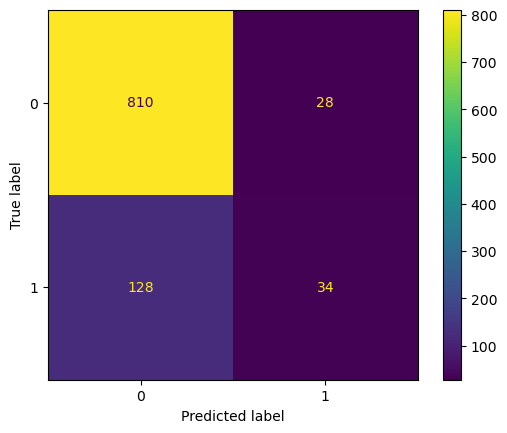

In [35]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()


In [36]:
y_test.value_counts()

False    838
True     162
Name: churn, dtype: int64

In [37]:
TP = 34
TN = 810
FN = 128
FP = 28

accuracy = (TP + TN) / ( TP + TN + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = (2 * (precision * recall))/ (precision + recall)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'recall: {recall}')
print(f'F1 Score: {f1_score}')

Accuracy: 0.844
Precision: 0.5483870967741935
recall: 0.20987654320987653
F1 Score: 0.30357142857142855


In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.97      0.91       838
        True       0.55      0.21      0.30       162

    accuracy                           0.84      1000
   macro avg       0.71      0.59      0.61      1000
weighted avg       0.81      0.84      0.81      1000



The above report shows the results of using Logistic Regression model. 

**Decision Trees**

In [39]:
#instantiate our tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=254)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=254)

Lets make predictions

In [69]:
from sklearn.metrics import accuracy_score

#predictions
y_pred = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)[:, 1]

accuracy_score(y_test, y_pred)

0.906

In [70]:
recall_score(y_test, y_pred)

0.6728395061728395

In [ ]:
precision_score(y_test, y_pred)

In [32]:
dt.predict_proba(X_test)[:,1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [41]:
lr.predict_proba(X_test)[:, 1]

array([0.18650994, 0.20781879, 0.09107922, 0.06151918, 0.00848708,
       0.01518666, 0.02560765, 0.03704391, 0.53315895, 0.01029904,
       0.03063421, 0.4484759 , 0.02157237, 0.25081931, 0.34929729,
       0.05428775, 0.37628188, 0.00097977, 0.27171393, 0.48922148,
       0.0027606 , 0.40504357, 0.05541439, 0.08810669, 0.00814539,
       0.65171471, 0.24705823, 0.04402779, 0.22095673, 0.07154899,
       0.11068286, 0.03313067, 0.13393927, 0.07468138, 0.05541967,
       0.00368613, 0.07640352, 0.06672553, 0.61364923, 0.01237828,
       0.04030395, 0.22021202, 0.0142684 , 0.0685902 , 0.24868632,
       0.13413833, 0.34986134, 0.04771484, 0.1957015 , 0.14540464,
       0.01367845, 0.08818621, 0.05683143, 0.21160414, 0.20405464,
       0.02058193, 0.14747027, 0.7784905 , 0.03549843, 0.34551996,
       0.04226376, 0.32937151, 0.06787417, 0.14681903, 0.14198205,
       0.15403763, 0.53920537, 0.09476712, 0.38302216, 0.04936981,
       0.47912821, 0.0125997 , 0.0142839 , 0.10223389, 0.22748

**Evaluate the models**

In [42]:
from sklearn.metrics import roc_curve, auc

lr_y_prob = lr.predict_proba(X_test)[:, 1]
dt_y_prob = dt.predict_proba(X_test)[:, 1]

lr_fpr, lr_tpr, i = roc_curve(y_test, lr_y_prob)
dt_fpr, dt_tpr, i = roc_curve(y_test, dt_y_prob)

lr_auc = auc(lr_fpr, lr_tpr)
dt_auc = auc(dt_fpr, dt_tpr)

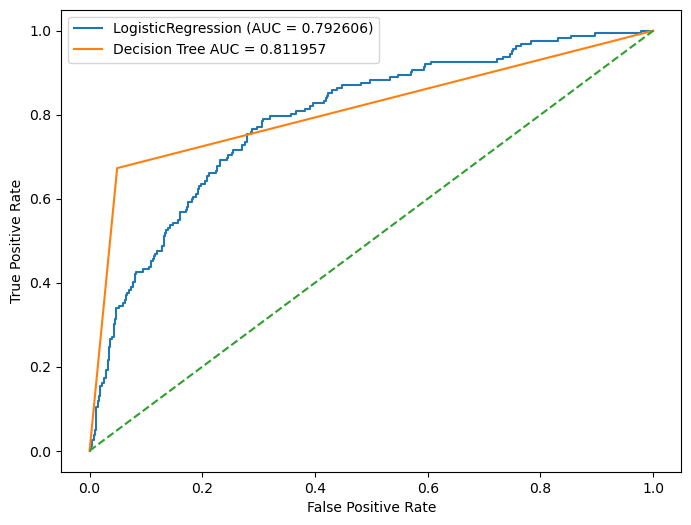

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'LogisticRegression (AUC = {lr_auc:2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree AUC = {dt_auc:2f}')
plt.plot([0,1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[797  41]
 [ 53 109]]

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.95      0.94       838
        True       0.73      0.67      0.70       162

    accuracy                           0.91      1000
   macro avg       0.83      0.81      0.82      1000
weighted avg       0.90      0.91      0.90      1000

ROC-AUC Score: 0.8119567459265151
